In [2]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

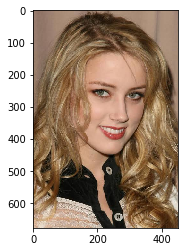

In [6]:
img = mpimg.imread('amber.jpg')
plt.imshow(img)
plt.show()

In [53]:
img.shape

(678, 452, 3)

In [58]:
bw = img.mean(axis=2)

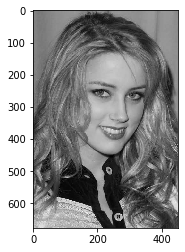

In [8]:
plt.imshow(bw, cmap='gray')

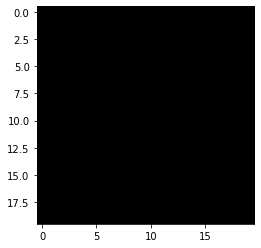

In [52]:
W = np.zeros((20,20))
plt.imshow(W, cmap='gray')

In [10]:
for i in range(20):
    for j in range(20):
        dist = (i - 9.5)**2 + (j - 9.5)**2
        W[i, j] = np.exp(-dist / 50)

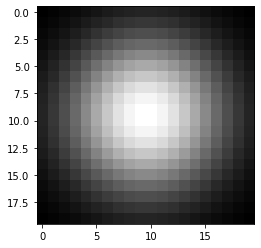

In [11]:
plt.imshow(W, cmap='gray')

In [12]:
out = convolve2d(bw, W)

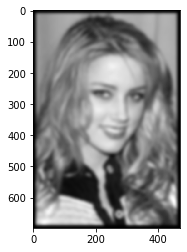

In [13]:
plt.imshow(out, cmap='gray')

In [14]:
out.shape

(697, 471)

In [15]:
out = convolve2d(bw, W, mode='same')

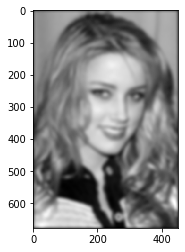

In [18]:
plt.imshow(out, cmap='gray')
plt.show()

In [19]:
out.shape

(678, 452)

In [20]:
bw.shape

(678, 452)

In [32]:
out3 = np.zeros(img.shape)

In [33]:
for i in range(3):
    out3[:,:,i] = convolve2d(img[:,:,i], W, mode='same')

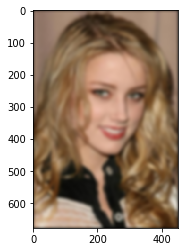

In [35]:
plt.imshow(out3.astype('uint8'))

In [36]:
Hx = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
], dtype=np.float32)

In [37]:
Hy = Hx.T

In [38]:
Hy

array([[-1., -2., -1.],
       [ 0.,  0.,  0.],
       [ 1.,  2.,  1.]], dtype=float32)

In [39]:
Gx = convolve2d(bw, Hx)

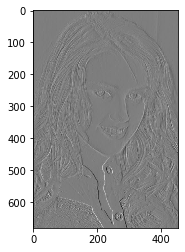

In [40]:
plt.imshow(Gx, cmap='gray')

In [41]:
Gy = convolve2d(bw, Hy)

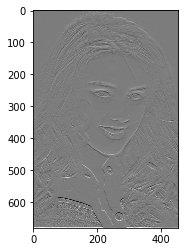

In [42]:
plt.imshow(Gy, cmap='gray')

In [43]:
G = np.sqrt(Gx*Gx, Gy*Gy)

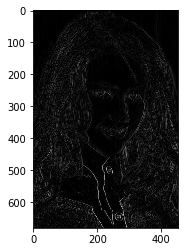

In [44]:
plt.imshow(G, cmap='gray')

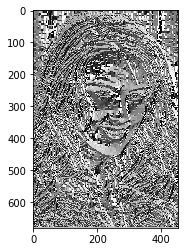

In [45]:
theta = np.arctan2(Gy, Gx)
plt.imshow(theta, cmap='gray')

In [54]:
def convolve2d(X, W):
    t0 = datetime.now()
    n1, n2 = X.shape
    m1, m2 = W.shape
    Y = np.zeros((n1 + m1 - 1, n2 + m2 - 1))
    for i in range(n1):
        for j in range(n2):
            Y[i:i+m1, j:j+m1] += X[i,j]*W
    print("elapsed time: ", (datetime.now() - t0))
    return Y